# Accessing 1D slices

Some boilerplate code

In [1]:
import numpy as np
from postcactus.simdir import SimDir
%matplotlib inline
import matplotlib.pyplot as plt

For working with grid data, we need another module

In [8]:
from postcactus import grid_data as gd

Get object representing simulation data

In [2]:
example_data = "~/bns_minimal_example"
sd = SimDir(example_data)

1D grid data accessed via sd.grid.x

In [3]:
print sd.grid.x


Available grid data of dimension (0,) (including cuts): 
['polar_coords_old', 'merger_xy', 'hmns_moments_old', 'hmns_moments', 'merger_xy_v2', 'polar_coords', 'grid_export_29ms_disk160km_remap', 'merger', 'merger_xy_t13_15', 'merger_xy_t7_9', 'merger_xy_disk', 'grid_export_29ms_disk80km_remap', 'merger_xy_v3', 'grid_export_29ms_remnant_transf_WRONG', 'rho', 'grid_export_29ms_remnant_remap']



Available iterations for density:

In [5]:
sd.grid.x.get_iters('rho')

array([     0,    256,    512,    768,   1024,   1280,   1536,   1792,
         2048,   2304,   2560,   2816,   3072,   3328,   3584,   3840,
         4096,   4352,   4608,   4864,   5120,   5376,   5632,   5888,
         6144,   6400,   6656,   6912,   7168,   7424,   7680,   7936,
         8192,   8448,   8704,   8960,   9216,   9472,   9728,   9984,
        10240,  10496,  10752,  11008,  11264,  11520,  11776,  12032,
        12288,  12544,  12800,  13056,  13312,  13568,  13824,  14080,
        14336,  14592,  14848,  15104,  15360,  15616,  15872,  16128,
        16384,  16640,  16896,  17152,  17408,  17664,  17920,  18176,
        18432,  18688,  18944,  19200,  19456,  19712,  19968,  20224,
        20480,  20736,  20992,  21248,  21504,  21760,  22016,  22272,
        22528,  22784,  23040,  23296,  23552,  23808,  24064,  24320,
        24576,  24832,  25088,  25344,  25600,  25856,  26112,  26368,
        26624,  26880,  27136,  27392,  27648,  27904,  28160,  28416,
      

In [19]:
it  = 0
rho = sd.grid.x.read('rho', it)

For 1D slices, special method for reading mesh-refinement hirachy as irregular spaced 1D grid

In [9]:
x,rho_x = gd.merge_comp_data_1d(rho)

(-60, 60)

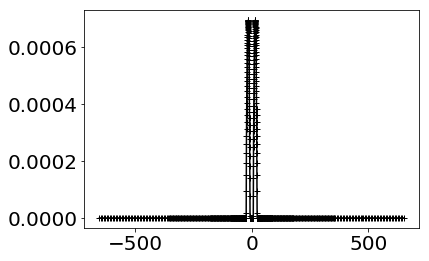

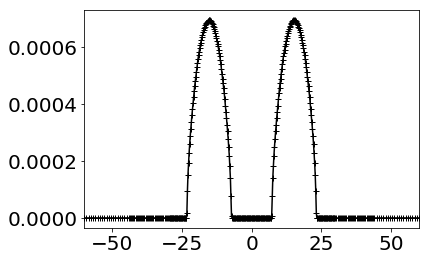

In [20]:
plt.plot(x, rho_x, 'k-+')
plt.figure()
plt.plot(x, rho_x, 'k-+')
plt.xlim(-60,60)

Can also resample to regular grid while loading:

In [16]:
it = 0
n_points = 400
x0 = -60.0
x1 = 60.0
g = gd.RegGeom([n_points], [x0], x1=[x1])

srho = sd.grid.x.read('rho', it, geom=g, order=2)
sx, = srho.coords1d()

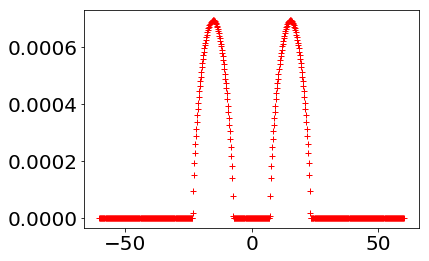

In [18]:
plt.plot(sx, srho.data, 'r+');